# Heart disease prediction (September 16th, 2024)

In [1]:
!gdown -cq 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

## Question 1: Visualize the relationship between age and heart disease

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


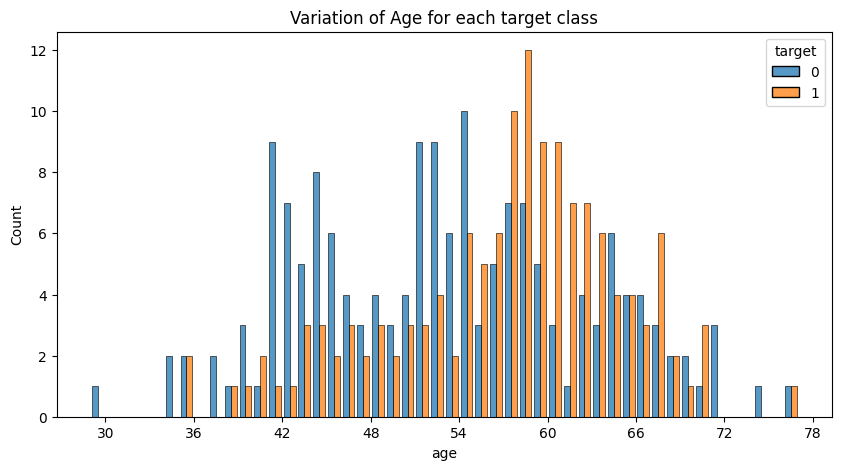

In [75]:
# Your code here *******************************
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x="age", hue='target',
                  legend=True, multiple="dodge", shrink=0.8, binwidth=1).set(title='Variation of Age for each target class')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.show()

## Question 2: Visualize the relationship among age, sex and heart disease

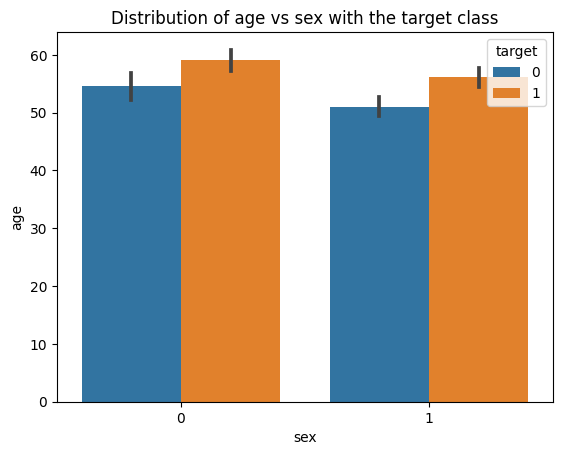

In [80]:
# Your code here *********************************
sns.barplot(data=df, x="sex", y='age', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## Question 3: Implement KNN model

In [85]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [99]:
# your code here ***************************
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model_knn = KNeighborsClassifier(n_neighbors=5,
                                 weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
model_knn.fit(X_train, y_train)
y_pred_train = model_knn.predict(X_train)
y_pred_test = model_knn.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior wi

In [117]:
def print_accuracy(cm_train, cm_test, model_name):
    accuracy_for_train = np.round(
        (cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
    accuracy_for_test = np.round(
        (cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
    print('Accuracy for training set for {} = {}'.format(
        model_name, accuracy_for_train))
    print('Accuracy for test set for {} = {}'.format(
        model_name, accuracy_for_test))

In [118]:
print_accuracy(cm_train, cm_test, 'KNeighborsClassifier')

Accuracy for training set for KNeighborsClassifier = 0.79
Accuracy for test set for KNeighborsClassifier = 0.84


## Question 4: Implement SVM model

In [144]:
from sklearn.svm import SVC


model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train, y_train)
y_pred_train = model_svm.predict(X_train)
y_pred_test = model_svm.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [145]:
print_accuracy(cm_train, cm_test, 'SVM')

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


## Question 5: Implement NB model

In [124]:
from sklearn.naive_bayes import GaussianNB


model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_train = model_nb.predict(X_train)
y_pred_test = model_nb.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [126]:
print_accuracy(cm_train, cm_test, 'Naive Bayes')

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


## Question 6: Implement Decision Tree model

In [127]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(
    criterion='gini', max_depth=10, min_samples_split=2)
model_dt.fit(X_train, y_train)
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [128]:
print_accuracy(cm_train, cm_test, 'Decision Tree')

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.74


## Question 7: Implement Random Forest model

In [147]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(
    criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [148]:
print_accuracy(cm_train, cm_test, 'Random Forest')

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


## Question 8: Implement AdaBoost model

In [131]:
from sklearn.ensemble import AdaBoostClassifier


model_ab = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
model_ab.fit(X_train, y_train)
y_pred_train = model_ab.predict(X_train)
y_pred_test = model_ab.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [133]:
print_accuracy(cm_train, cm_test, 'Adaboost')

Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


## Question 9: Implement GradientBoosting model

In [134]:
from sklearn.ensemble import GradientBoostingClassifier


model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      subsample=1.0, min_samples_split=2,
                                      max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_train = model_gb.predict(X_train)
y_pred_test = model_gb.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [136]:
print_accuracy(cm_train, cm_test, 'Gradient Boosting')

Accuracy for training set for Gradient Boosting = 1.0
Accuracy for test set for Gradient Boosting = 0.85


## Question 10: Implement XGBoost model

In [139]:
from xgboost import XGBClassifier


model_xgb = XGBClassifier(objective="binary:logistic",
                          random_state=42, n_estimators=100)
model_xgb.fit(X_train, y_train)
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [157]:
print_accuracy(cm_train, cm_test, 'XGBoost')

Accuracy for training set for XGBoost = 0.92
Accuracy for test set for XGBoost = 0.89


## Question 11: Implement a Stacking model

In [155]:
import random
from sklearn.ensemble import StackingClassifier
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)


stacking_model = StackingClassifier(estimators=[('Decision Tree', dtc), ('Random Forest', rfc), (
    'KNN', knn), ('GradientBoosting', gc), ('SVM', svc), ('AdaBoost', ad)], final_estimator=xgb)
stacking_model.fit(X_train, y_train)
y_pred_train = stacking_model.predict(X_train)
y_pred_test = stacking_model.predict(X_test)
cm_train, cm_test = confusion_matrix(
    y_train, y_pred_train), confusion_matrix(y_test, y_pred_test)

In [158]:
print_accuracy(cm_train, cm_test, 'Stacking Classifier')

Accuracy for training set for Stacking Classifier = 0.92
Accuracy for test set for Stacking Classifier = 0.89
